<a href="https://colab.research.google.com/github/shadatsh/Network_Intrusions/blob/main/Network_intrusion_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

le = LabelEncoder()
rScaler = RobustScaler()



In [3]:
df=pd.read_csv("/content/drive/MyDrive/Network_Intrusion.csv",sep=",",encoding="utf-8")

Get a glimbse of the Dataset

In [ ]:
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


Statistics about Dataset's distribution

In [ ]:
df.describe()

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,150,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(125972, 42)

Dataset consists of 125972 rows and 42 coloumns

View data types of all the coloumns

In [ ]:
df.dtypes

0             int64
tcp          object
ftp_data     object
SF           object
491           int64
0.1           int64
0.2           int64
0.3           int64
0.4           int64
0.5           int64
0.6           int64
0.7           int64
0.8           int64
0.9           int64
0.10          int64
0.11          int64
0.12          int64
0.13          int64
0.14          int64
0.15          int64
0.16          int64
0.18          int64
2             int64
2.1           int64
0.19        float64
0.20        float64
0.21        float64
0.22        float64
1           float64
0.23        float64
0.24        float64
150           int64
25            int64
0.17        float64
0.03        float64
0.17.1      float64
0.25        float64
0.26        float64
0.27        float64
0.05        float64
0.28        float64
normal       object
dtype: object

There're 4 coloumns of type object

In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

Inserting coloumn names

In [4]:

columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'class'])

df.columns = columns

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [ ]:
df["class"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

Targeted class coloumn should only has 2 categories,
Normal (1) & Attack(0)

In [5]:
df['class'] = (df['class'] != "normal") * 1

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


Different types of network traffic (normal vs. attack) distribute across different protocols( udp, tcp and icmp)

<Axes: xlabel='protocol_type', ylabel='count'>

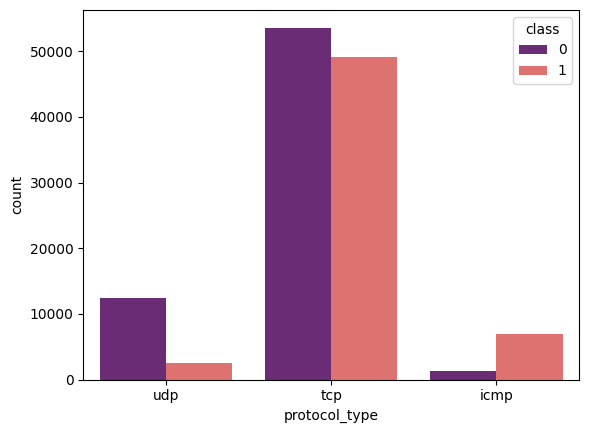

In [ ]:
sns.countplot(x='protocol_type', data=df, hue='class', palette='magma')

Normal class distribution across different protocols

<ipython-input-6-5823510a1186>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='protocol_type', data=df_normal, palette='magma')


<Axes: xlabel='protocol_type', ylabel='count'>

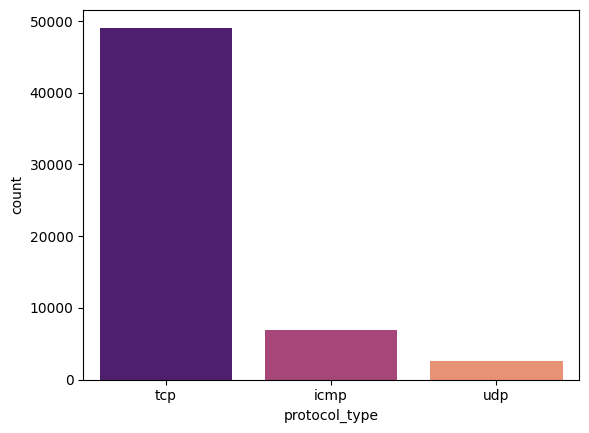

In [6]:
df_normal = df[df['class'] == 1]
sns.countplot(x='protocol_type', data=df_normal, palette='magma')

Understanding class balance or imbalance

<Axes: ylabel='count'>

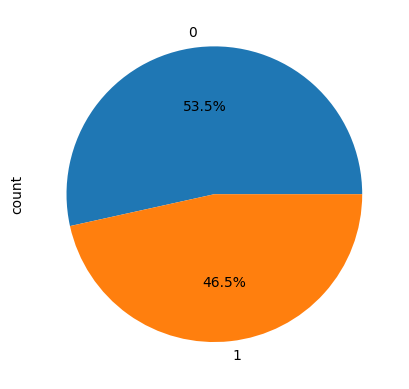

In [ ]:
round(df["class"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.1f%%')

Check for missing values

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Check for duplicates

In [ ]:
df.duplicated().any()

True

Drop duplicates

In [7]:
df.drop_duplicates(keep=False,inplace=True)

In [8]:
df.duplicated().any()

False

Encoding categorical coloumns using label encoding

In [9]:
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])

Get all possible values in column

In [ ]:

print(df["protocol_type"].value_counts())
print(df["service"].value_counts())
print(df["flag"].value_counts())

protocol_type
1    102688
2     14993
0      8274
Name: count, dtype: int64
service
24    40338
49    21853
12     9043
54     7313
20     6859
      ...  
61        3
27        2
3         2
22        2
25        1
Name: count, Length: 70, dtype: int64
flag
9     74927
5     34851
1     11233
4      2421
2      1562
6       365
10      271
7       127
3       103
8        49
0        46
Name: count, dtype: int64


In [ ]:
df.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Identify the distribution of data in each coloumn

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'protocol_type'}>,
        <Axes: title={'center': 'service'}>,
        <Axes: title={'center': 'flag'}>,
        <Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>],
       [<Axes: title={'center': 'land'}>,
        <Axes: title={'center': 'wrong_fragment'}>,
        <Axes: title={'center': 'urgent'}>,
        <Axes: title={'center': 'hot'}>,
        <Axes: title={'center': 'num_failed_logins'}>,
        <Axes: title={'center': 'logged_in'}>],
       [<Axes: title={'center': 'num_compromised'}>,
        <Axes: title={'center': 'root_shell'}>,
        <Axes: title={'center': 'su_attempted'}>,
        <Axes: title={'center': 'num_root'}>,
        <Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'num_shells'}>],
       [<Axes: title={'center': 'num_access_files'}>,
        <Axes: title={'center': 'num_outbound_cmds'}>,
        <Axes: title={'cente

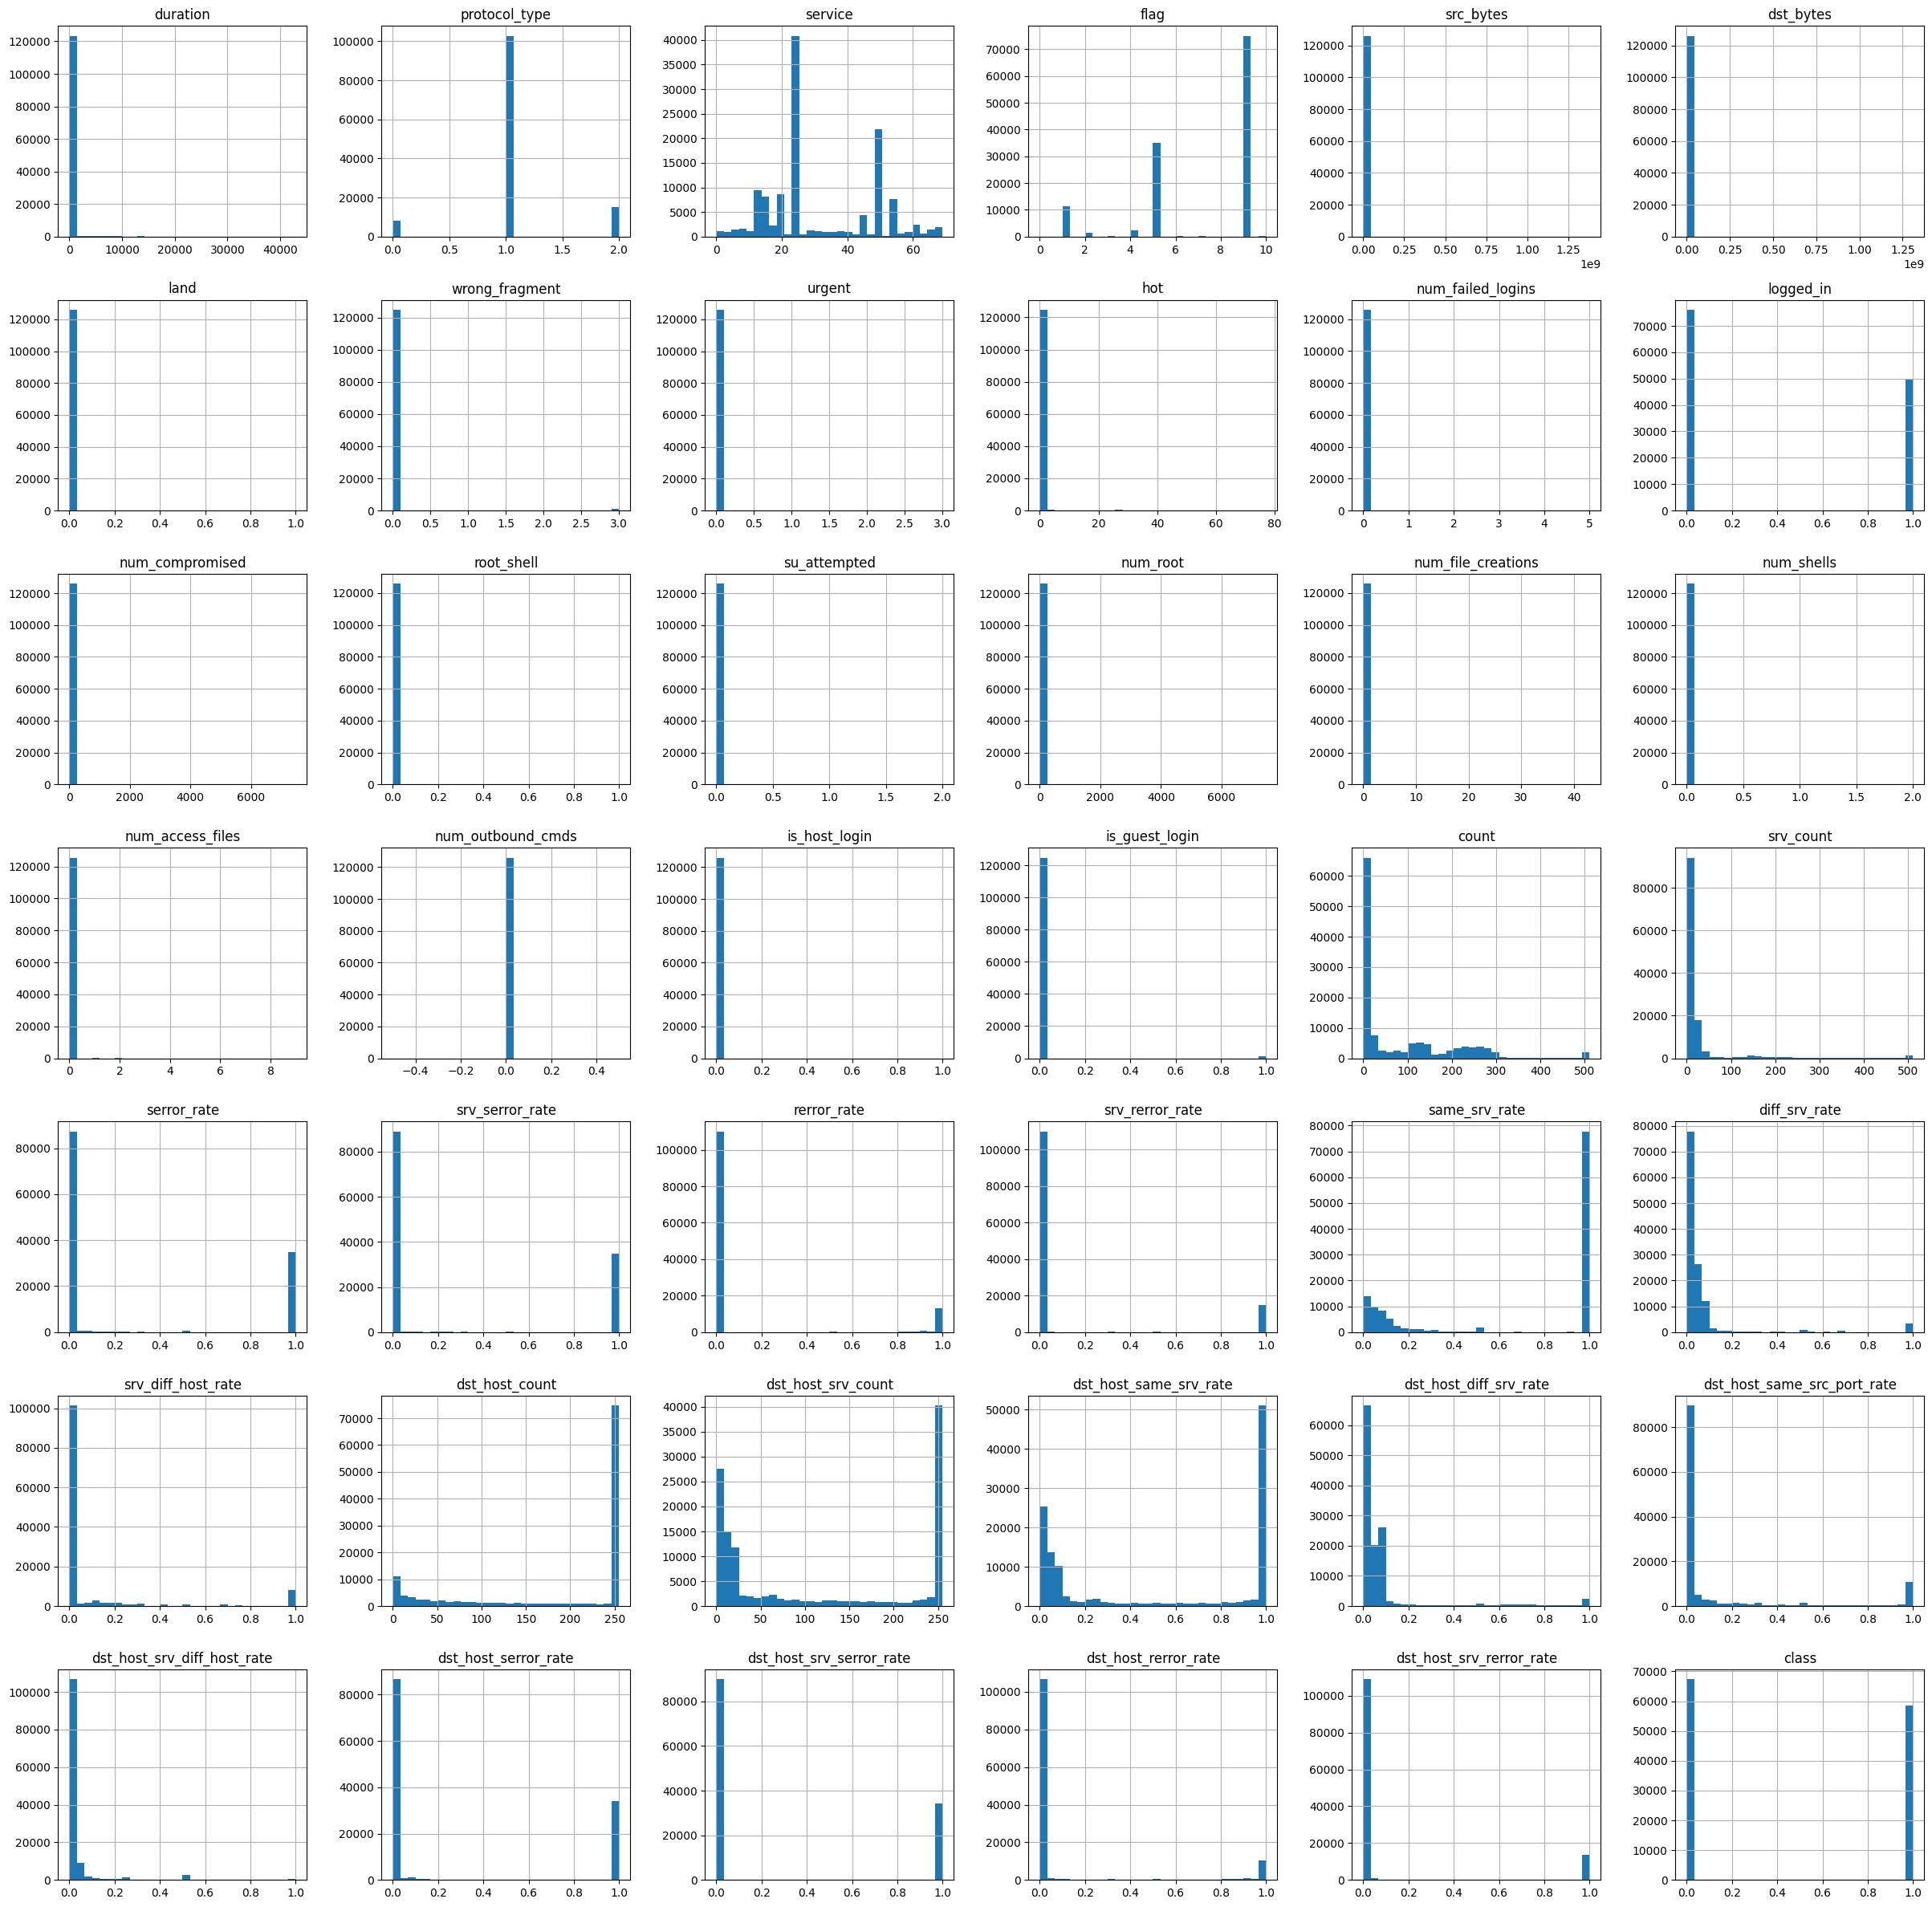

In [ ]:
df.hist(bins=30,figsize=[30,30])

Handle outliers in dataset

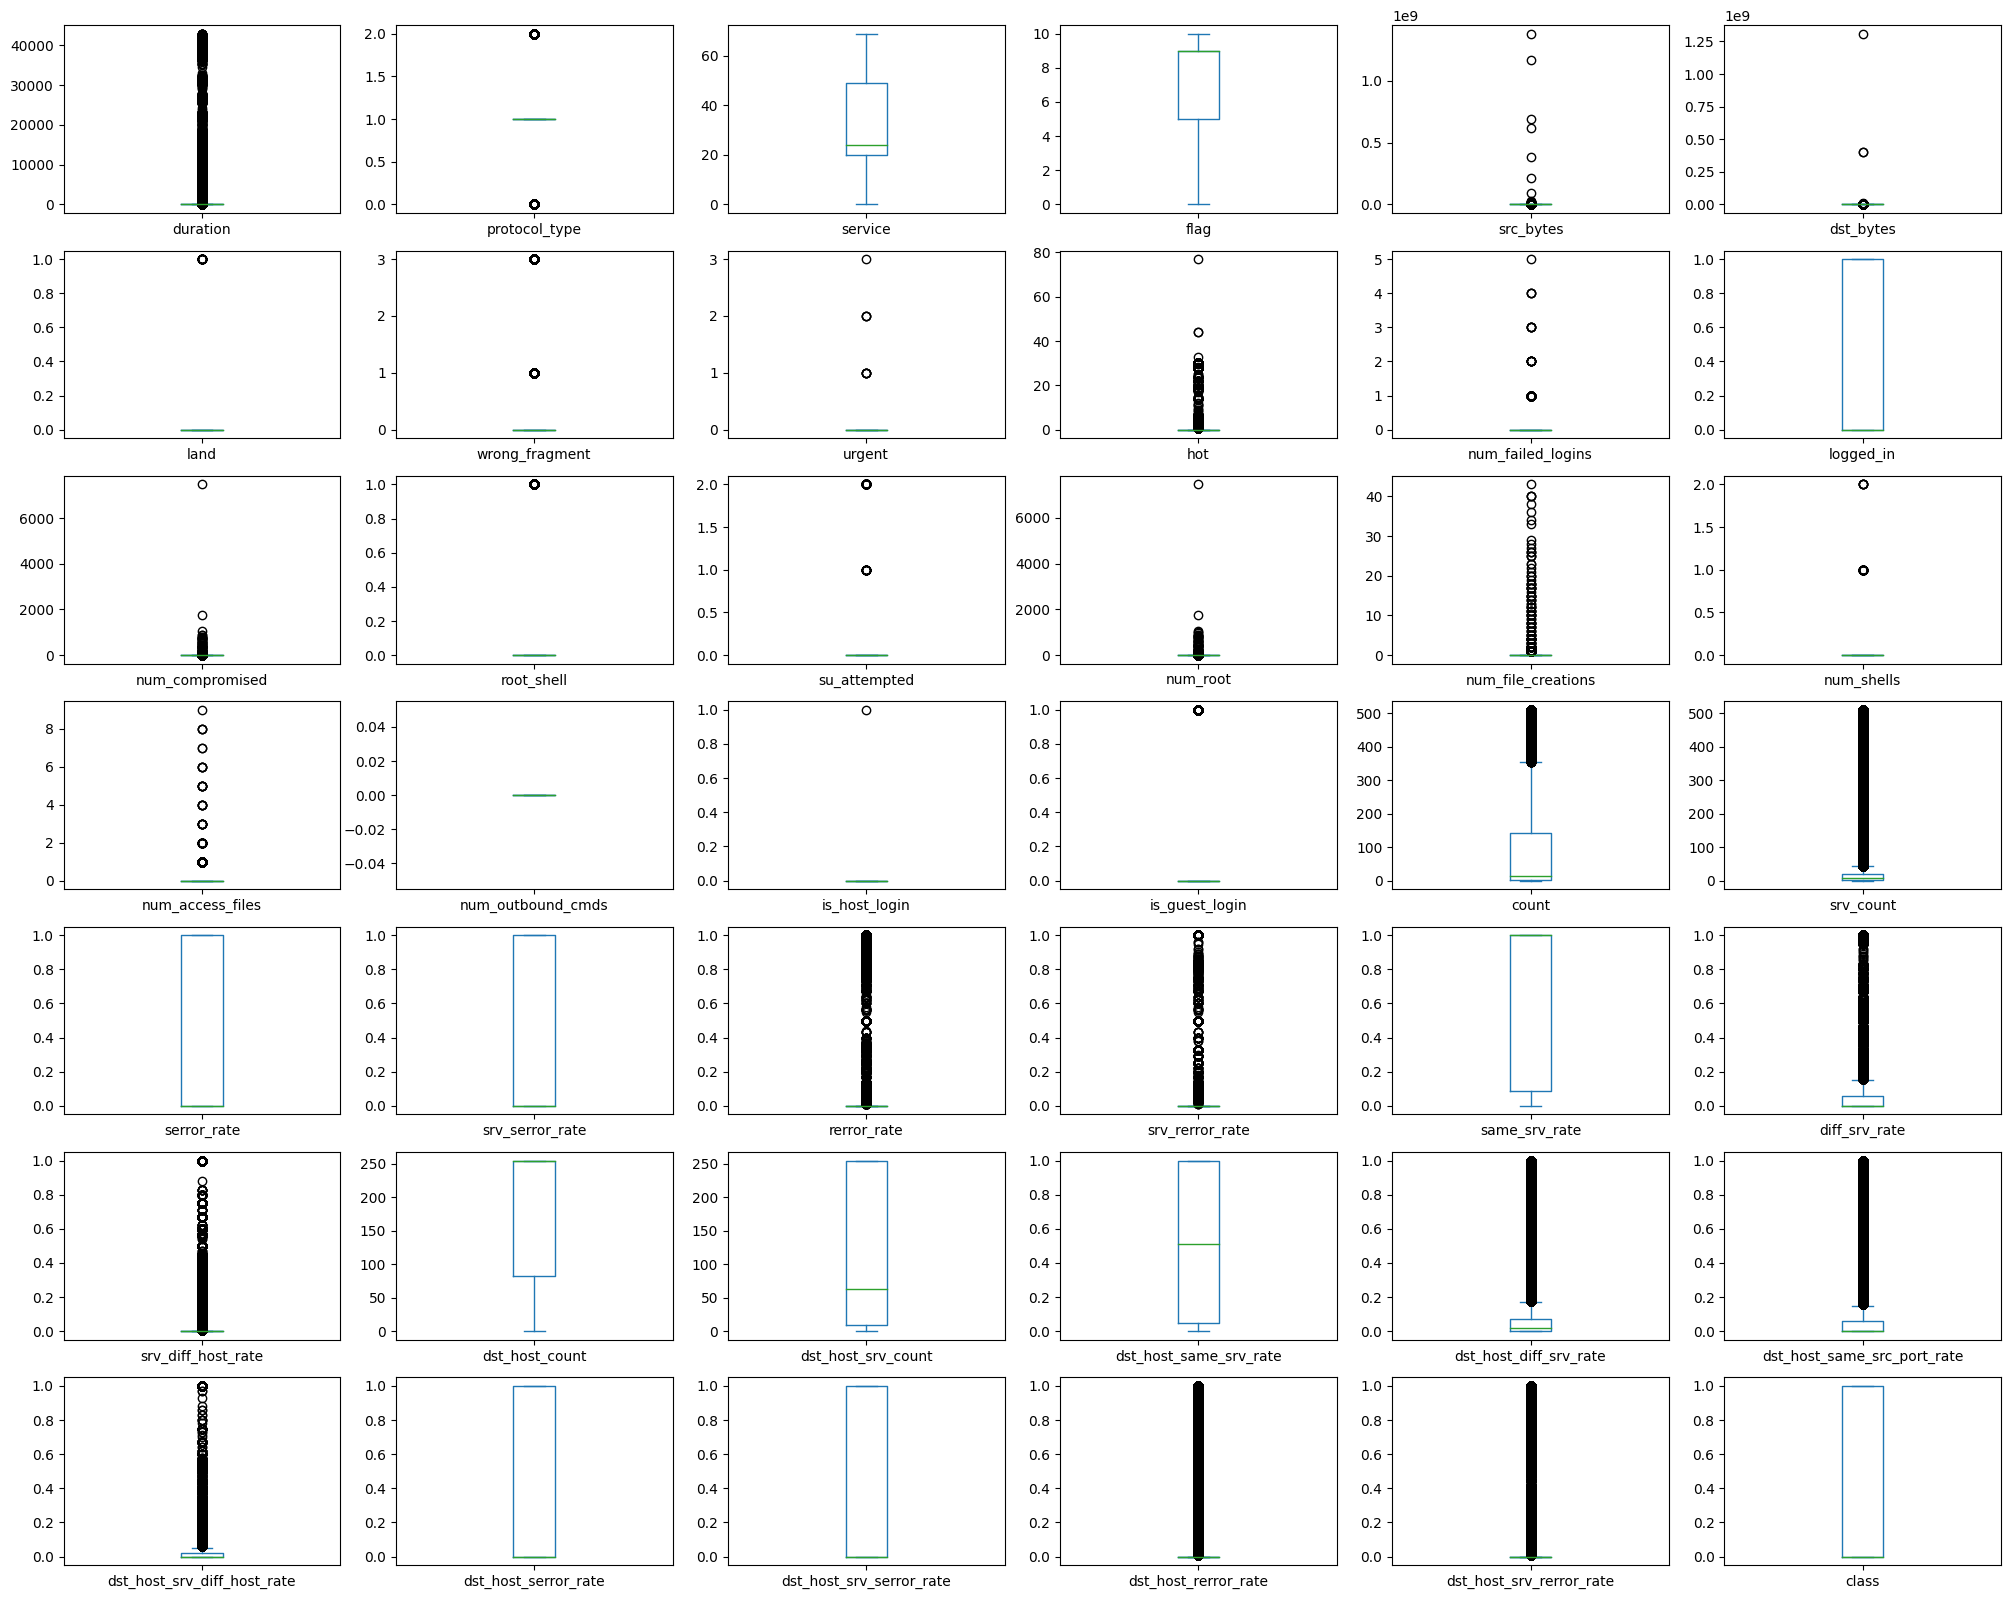

In [ ]:
df.plot(kind='box', subplots=True, layout=(7,6), figsize=(25,20))
plt.show()

In [10]:
df['class'] = le.fit_transform(df.iloc[:, -1])

In [ ]:
correlation_matrix = df.corr()

# Extract correlation with the encoded target
target_correlation = correlation_matrix['class']
print(target_correlation)

duration                       0.048804
protocol_type                 -0.281137
service                        0.276733
flag                          -0.647255
src_bytes                      0.005923
dst_bytes                      0.004119
land                           0.007193
wrong_fragment                 0.095926
urgent                        -0.002786
hot                           -0.013071
num_failed_logins             -0.003752
logged_in                     -0.690148
num_compromised               -0.010198
root_shell                    -0.020282
su_attempted                  -0.022447
num_root                      -0.011452
num_file_creations            -0.021269
num_shells                    -0.009470
num_access_files              -0.036698
num_outbound_cmds                   NaN
is_host_login                 -0.002629
is_guest_login                -0.039269
count                          0.576612
srv_count                      0.000809
serror_rate                    0.650811


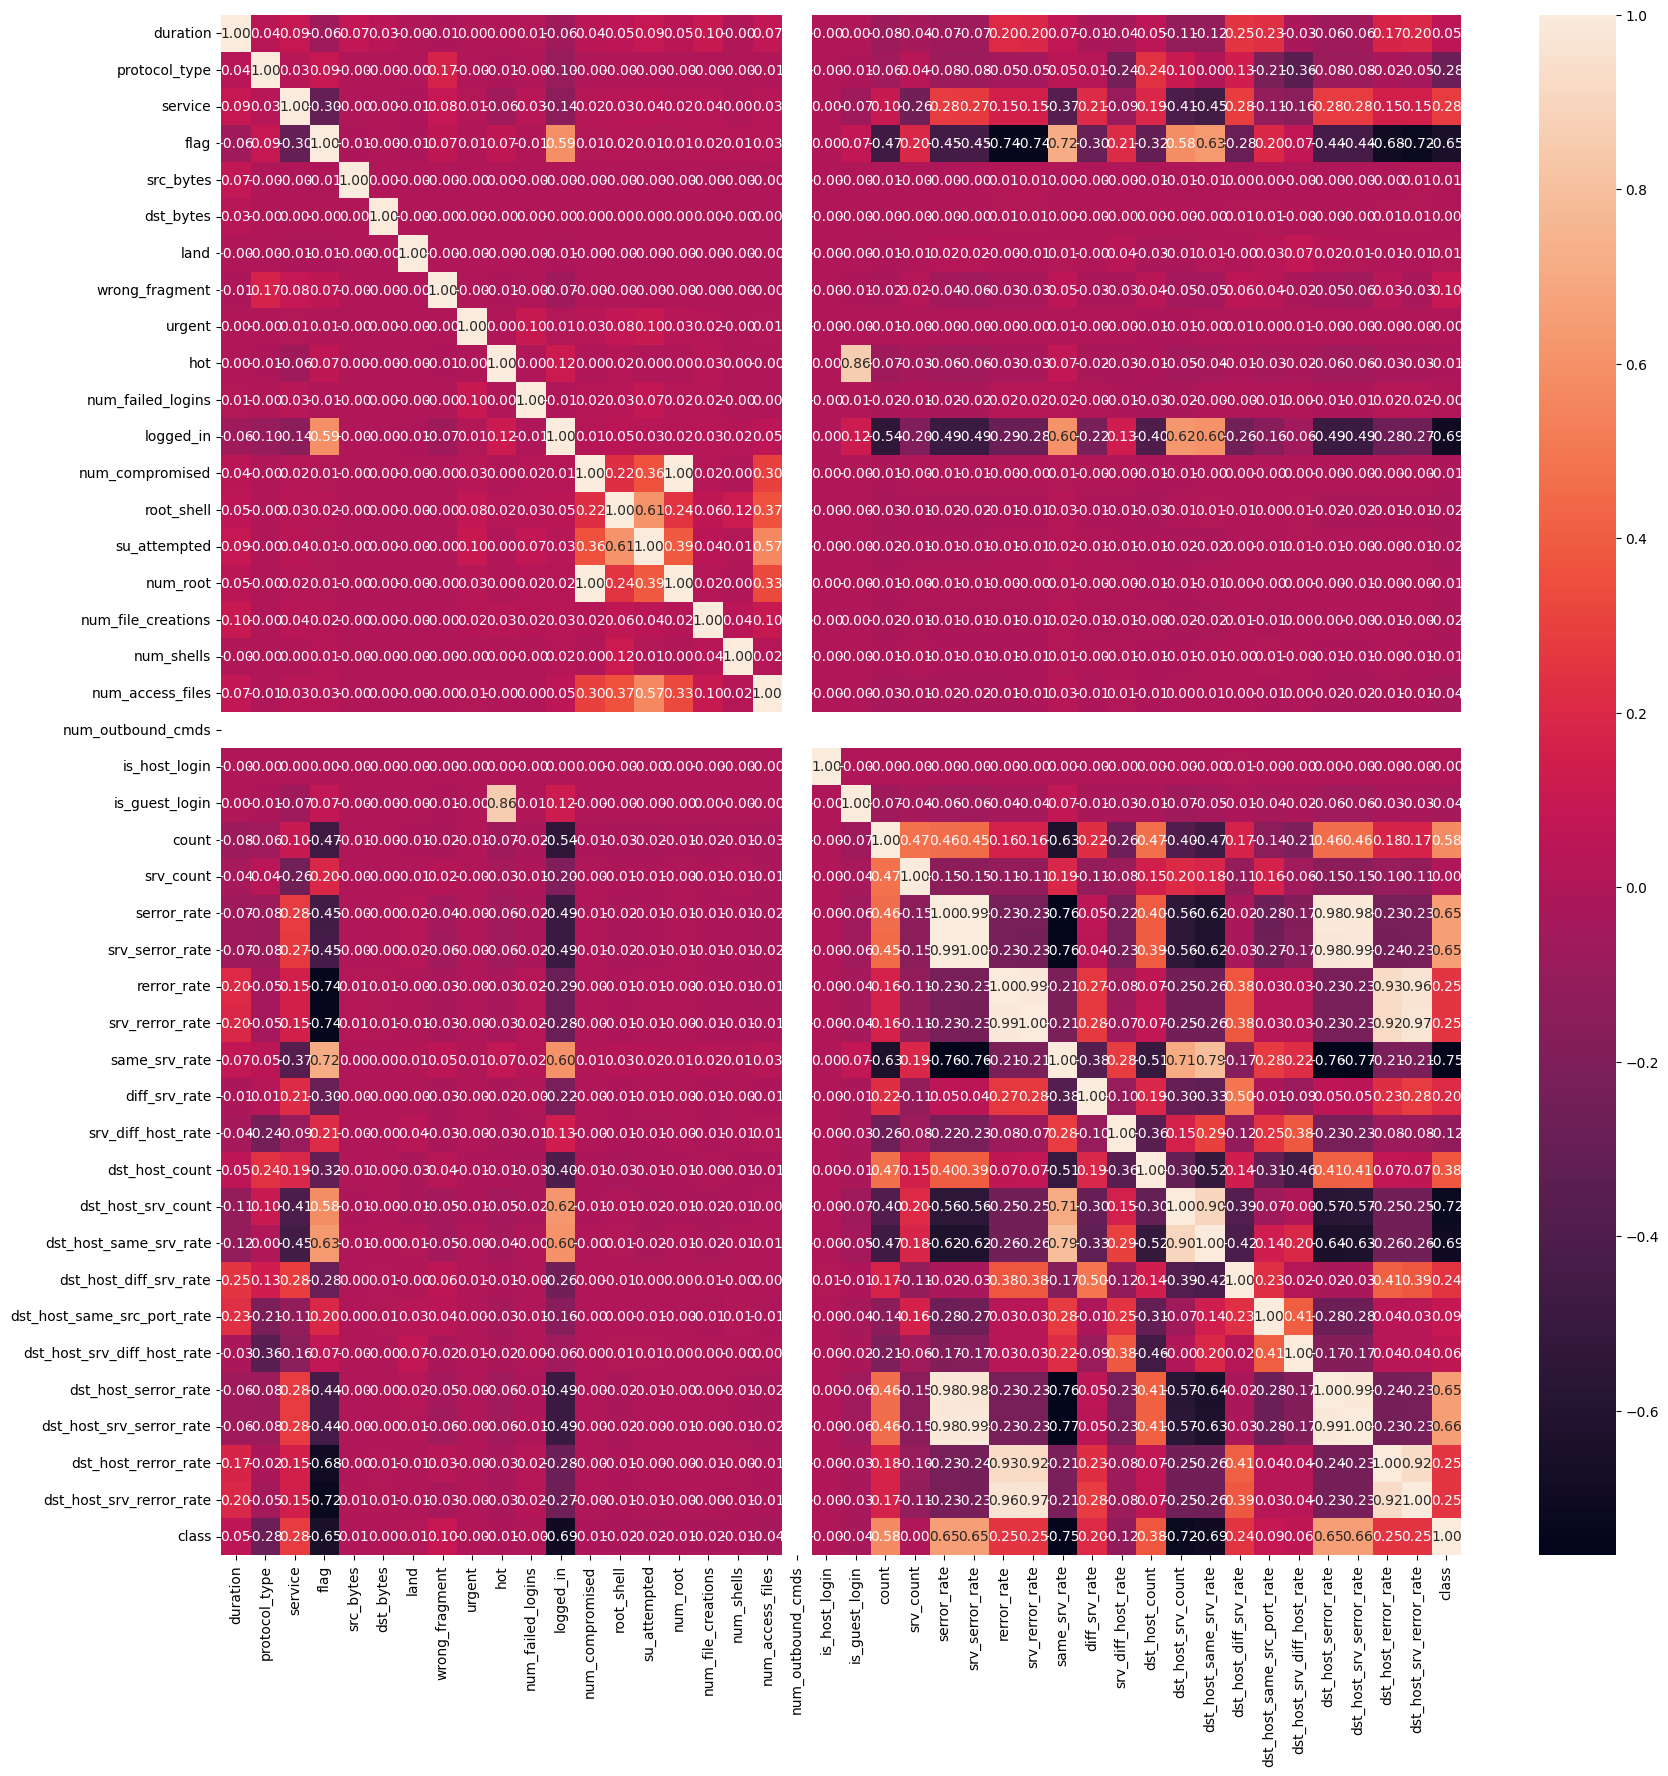

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [11]:
drop_columns = [
    'src_bytes', 'dst_bytes', 'land', 'urgent', 'num_failed_logins',
    'is_host_login', 'srv_count', 'num_outbound_cmds',
]

In [12]:
df.drop(columns=drop_columns, inplace=True)

In [13]:
df.shape

(125955, 34)

In [14]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'wrong_fragment', 'hot',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'serror_rate', 'srv_serror_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [15]:
x = df.drop(['class'], axis=1)
y = df['class'].copy()

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.20, random_state=42)

In [16]:
x_train.shape

(100764, 33)

**Implementation of Machine Learning models**

1.Random Forest Classifier

In [17]:
rfst = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2)

In [18]:
rfst.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [19]:
y_train_pred = rfst.predict(x_train)
y_pred = rfst.predict(x_test)

In [22]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9998
Testing Accuracy: 0.9973


<BarContainer object of 2 artists>

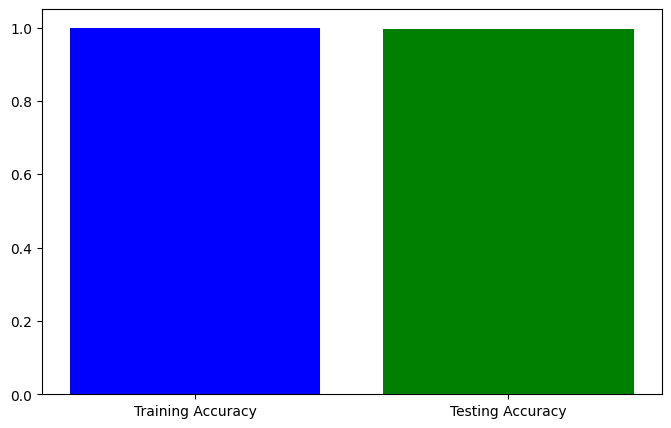

In [23]:

accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'green'])

In [36]:
RF_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {RF_accuracy:.4f}")

Accuracy Score: 0.9973


In [ ]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9971


In [ ]:
rec = recall_score(y_test, y_pred)
print(f"Recall: {rec:.4f}")

Recall: 0.9960


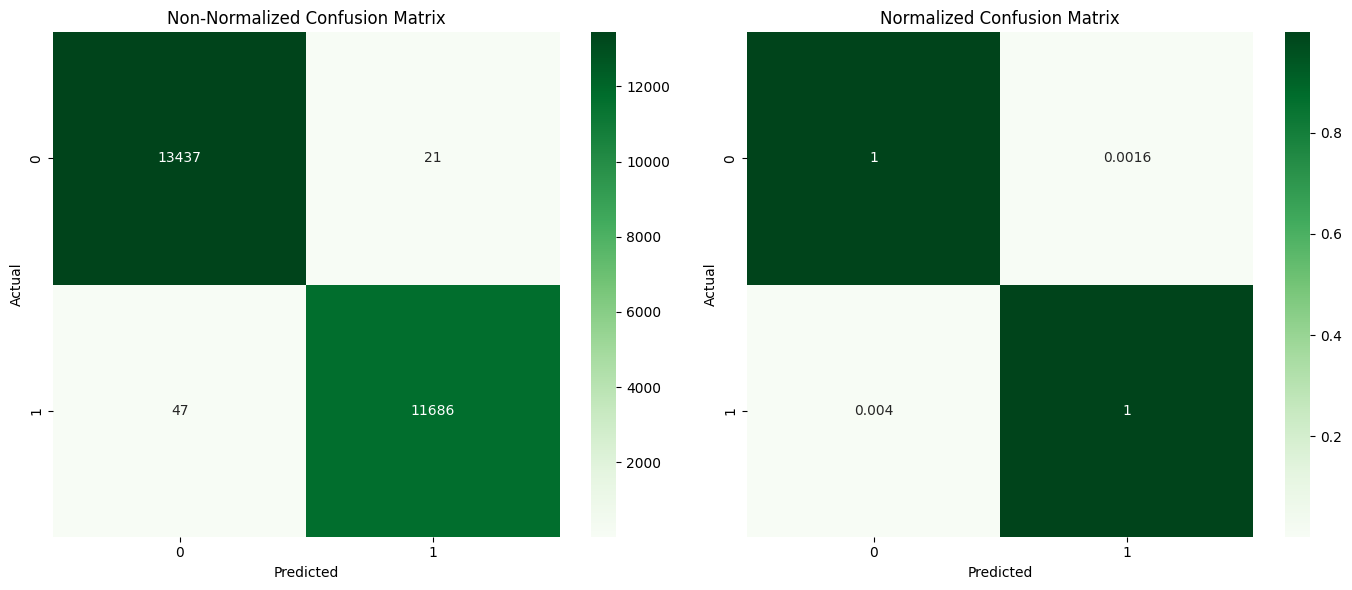

In [ ]:

cm = confusion_matrix(y_test, y_pred)
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax1)
ax1.set_title('Non-Normalized Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm_normalized, annot=True, cmap='Greens', ax=ax2)
ax2.set_title('Normalized Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

2. Support Vector Machine

Linear SVM

In [24]:

lin = make_pipeline(StandardScaler(), LinearSVC(dual=False, C=1, random_state=42))
lin.fit(x_train[:10000], y_train[:10000])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=False, random_state=42))])

In [25]:
y_pred_Linear_train = lin.predict(x_train)
y_pred_Linear = lin.predict(x_test)

In [26]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_Linear})
df.head(30)

,Y_test,Y_pred
107031,0,0
71713,0,0
30765,1,1
46897,1,1
52533,0,0
79386,1,1
22929,0,0
37297,0,0
5616,0,0
6331,0,0


In [27]:
train_accuracy = accuracy_score(y_train, y_pred_Linear_train)
test_accuracy = accuracy_score(y_test, y_pred_Linear)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9565
Testing Accuracy: 0.9552


<BarContainer object of 2 artists>

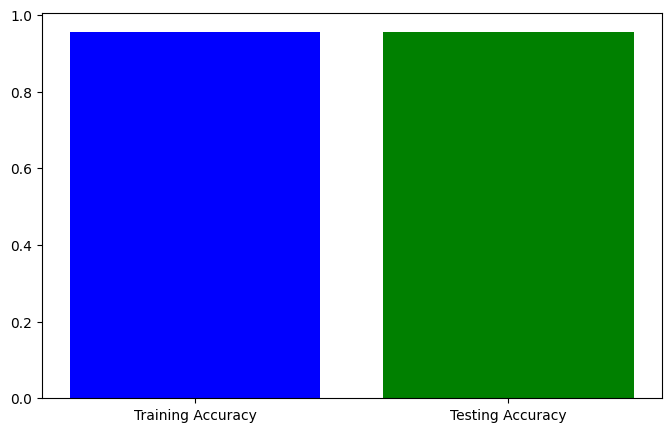

In [28]:
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'green'])

In [38]:
sv_Linear_accuracy = accuracy_score(y_test, y_pred_Linear)
print(f"Accuracy Score: {sv_Linear_accuracy:.4f}")

Accuracy Score: 0.9552


In [ ]:
f1 = f1_score(y_test, y_pred_Linear)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9514


In [ ]:
rec = recall_score(y_test, y_pred_Linear)
print(f"Recall: {rec:.4f}")

Recall: 0.9410


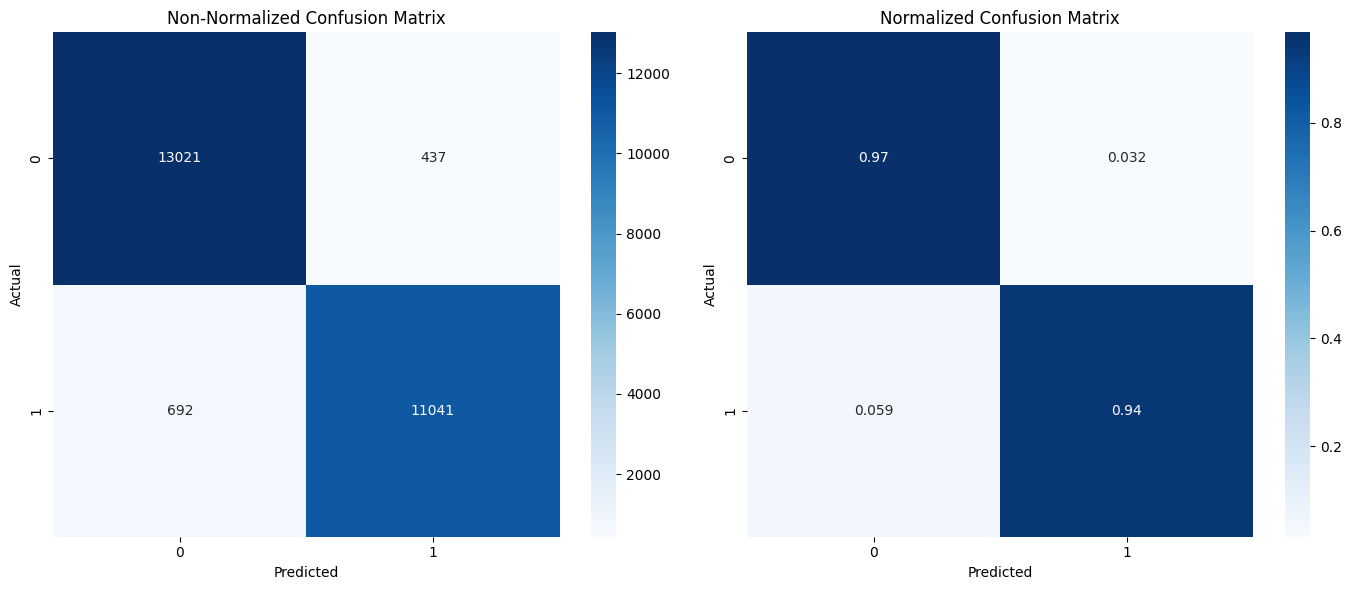

In [ ]:

cm = confusion_matrix(y_test, y_pred_Linear)
cm_normalized = confusion_matrix(y_test, y_pred_Linear, normalize='true')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Non-Normalized Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm_normalized, annot=True, cmap='Blues', ax=ax2)
ax2.set_title('Normalized Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

Polynomial SVM

In [29]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)

poly_sgd = make_pipeline(StandardScaler(), poly_features, SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, random_state=42))

In [30]:
poly_sgd.fit(x_train[:10000], y_train[:10000])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [31]:
y_pred_poly_train = poly_sgd.predict(x_train)
y_pred_poly = poly_sgd.predict(x_test)

In [32]:
train_accuracy = accuracy_score(y_train, y_pred_poly_train)
test_accuracy = accuracy_score(y_test, y_pred_poly)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9871
Testing Accuracy: 0.9860


<BarContainer object of 2 artists>

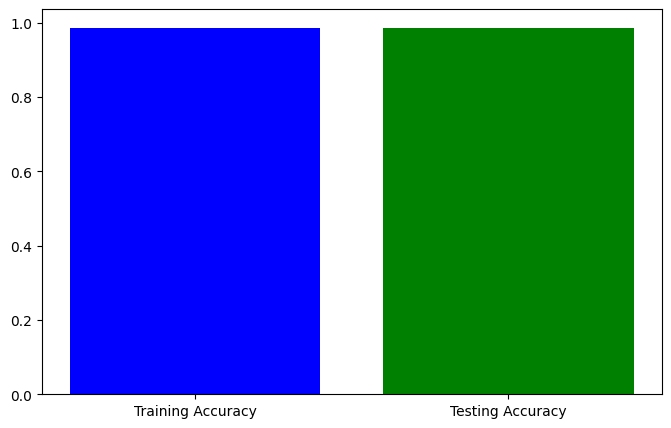

In [33]:
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'green'])

In [ ]:
f1 = f1_score(y_test, y_pred_poly)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9851


In [39]:
SV_Polynomial_accuracy = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy Score: {SV_Polynomial_accuracy:.4f}")

Accuracy Score: 0.9860


In [ ]:
rec = recall_score(y_test, y_pred_poly)
print(f"Recall: {rec:.4f}")

Recall: 0.9925


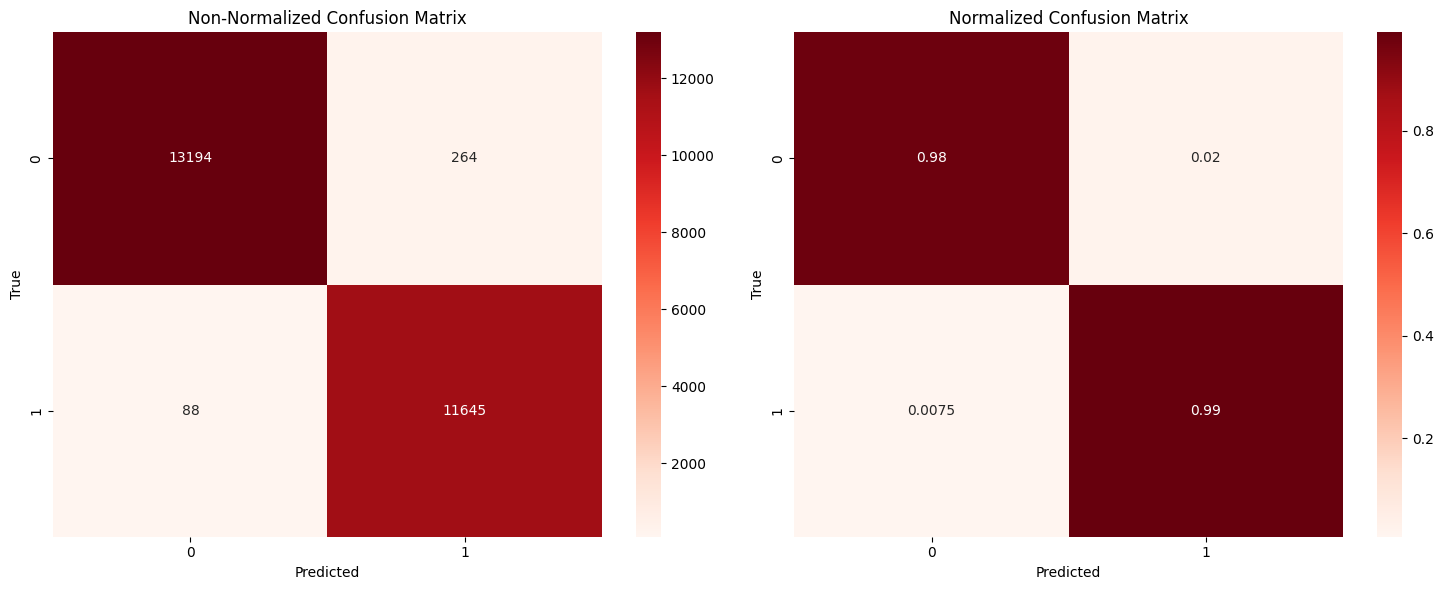

In [ ]:
cm_normalized = confusion_matrix(y_test, y_pred_poly, normalize='true')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=ax1)
ax1.set_title('Non-Normalized Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

sns.heatmap(cm_normalized, annot=True, cmap='Reds', ax=ax2)
ax2.set_title('Normalized Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')

plt.tight_layout()
plt.show()

Comparision of Models

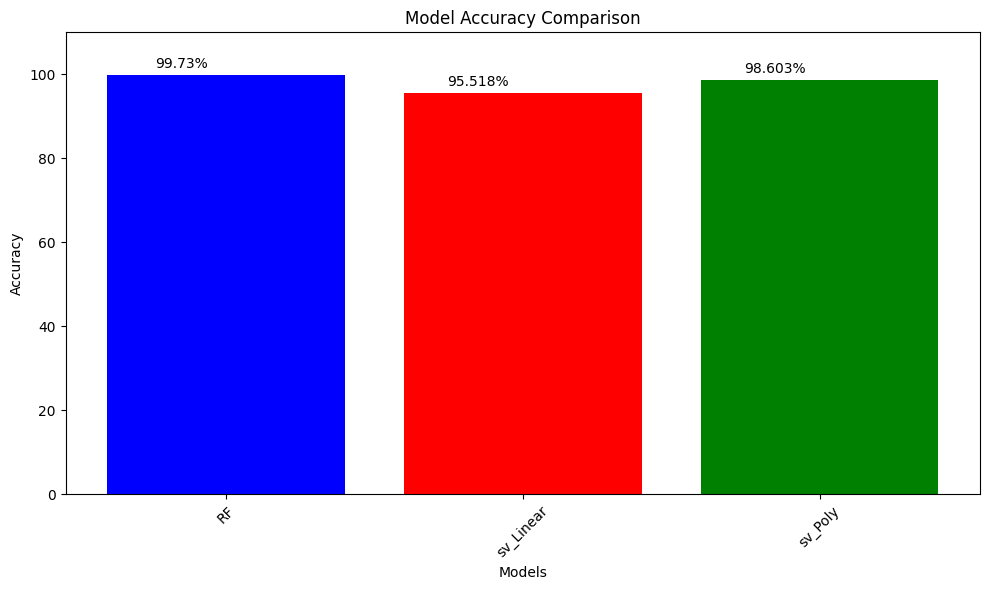

In [40]:

models = [ 'RF', 'sv_Linear', 'sv_Poly']
accuracies = [RF_accuracy*100, sv_Linear_accuracy*100, SV_Polynomial_accuracy*100]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'red', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 110)
plt.xticks(rotation=45)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.15,
             height + 1,
             f"{round(height, 3)}%",
             ha='center',
             va='bottom')

plt.tight_layout()

plt.show()